In [8]:
#pandas used to handle data frames
import pandas as pd
#
import numpy as np
#plotting capabilites
from plotnine import ggplot, aes, geom_bar, geom_histogram
import matplotlib.pyplot as plt
import seaborn as sns

nyc_prop_db = pd.read_csv("https://raw.githubusercontent.com/Rodri-Mario/ML-Final-Project/main/nyc-rolling-sales.csv")

nyc_prop_db.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Part 1: Exploratory Data Analysis (EDA)

To start of our EDA, lets look at the types of the variables in our dataset and also the count of non-null values. We can do this with the `info()` method from pandas.

In [ ]:
nyc_prop_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

From this we can notice some mismatch in the actual types of the variables and the types we would usally expect them to be. For example, `BOROUGH` is lised as a int, when we would perfer it to be some categorical variable. Another one that stands out is that `SALE PRICE` is listed as object when logically it should be reprsented as a numeric variable such as a float. We'll keep these ideas in mind when we move on to Data Cleaning.

Next let's take a look at some basic statistics of our features. Again pandas provides us a method that work great for this purpose, `describe()`.

In [ ]:
nyc_prop_db.describe(include = "all")

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548.000000,84548.000000,84548,84548,84548,84548.000000,84548.000000,84548,84548,84548,...,84548.000000,84548.000000,84548.000000,84548,84548,84548.000000,84548.000000,84548,84548,84548
unique,NaN,NaN,254,47,11,NaN,NaN,1,167,67563,...,NaN,NaN,NaN,6062,5691,NaN,NaN,166,10008,364
top,NaN,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,,D4,131-05 40TH ROAD,...,NaN,NaN,NaN,-,-,NaN,NaN,R4,-,2017-06-29 00:00:00
freq,NaN,NaN,3068,18235,38633,NaN,NaN,84548,12663,210,...,NaN,NaN,NaN,26252,27612,NaN,NaN,12989,14561,544
mean,10344.359878,2.998758,NaN,NaN,NaN,4237.218976,376.224015,NaN,NaN,NaN,...,2.025264,0.193559,2.249184,NaN,NaN,1789.322976,1.657485,NaN,NaN,NaN
std,7151.779436,1.289790,NaN,NaN,NaN,3568.263407,658.136814,NaN,NaN,NaN,...,16.721037,8.713183,18.972584,NaN,NaN,537.344993,0.819341,NaN,NaN,NaN
min,4.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,4231.000000,2.000000,NaN,NaN,NaN,1322.750000,22.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,1920.000000,1.000000,NaN,NaN,NaN
50%,8942.000000,3.000000,NaN,NaN,NaN,3311.000000,50.000000,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,NaN,NaN,1940.000000,2.000000,NaN,NaN,NaN
75%,15987.250000,4.000000,NaN,NaN,NaN,6281.000000,1001.000000,NaN,NaN,NaN,...,2.000000,0.000000,2.000000,NaN,NaN,1965.000000,2.000000,NaN,NaN,NaN


How intresting. From this we can tell that the all the values of `EASEMENT` are empty, and thus this may be a column we would like to drop in the data cleaning step. We can also see that a majority of the values in `LAND SQUARE FEET`,  `GROSS SQUARE FEET`, `APARTMENT NUMBER`, and even our proposed target value `SALES PRICE`are empty, so we might want to do something with them during the data cleaning step. In addtion there are several variables that serve as identifiers such as the 1st column and `ADDRESS`. Let's also look at the distinct values for all our columns, I'll go over any that my eye in further detail.

In [ ]:
for column in nyc_prop_db.columns:
  print("\n", nyc_prop_db[column].value_counts())


 Unnamed: 0
4        5
4699     5
4710     5
4709     5
4708     5
        ..
24948    1
24949    1
24950    1
24951    1
26739    1
Name: count, Length: 26736, dtype: int64

 BOROUGH
4    26736
3    24047
1    18306
5     8410
2     7049
Name: count, dtype: int64

 NEIGHBORHOOD
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: count, Length: 254, dtype: int64

 BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP A

After looking at this initial describe of our dataset, I noticed a couple of variables that might be useful in the training of our dataset, such as `BOROUGH`, `NEIGHBORHOOD`, and `BUILDING CLASS CATEGORY`. Let's look at the distribution of these variables.

<Axes: xlabel='BOROUGH'>

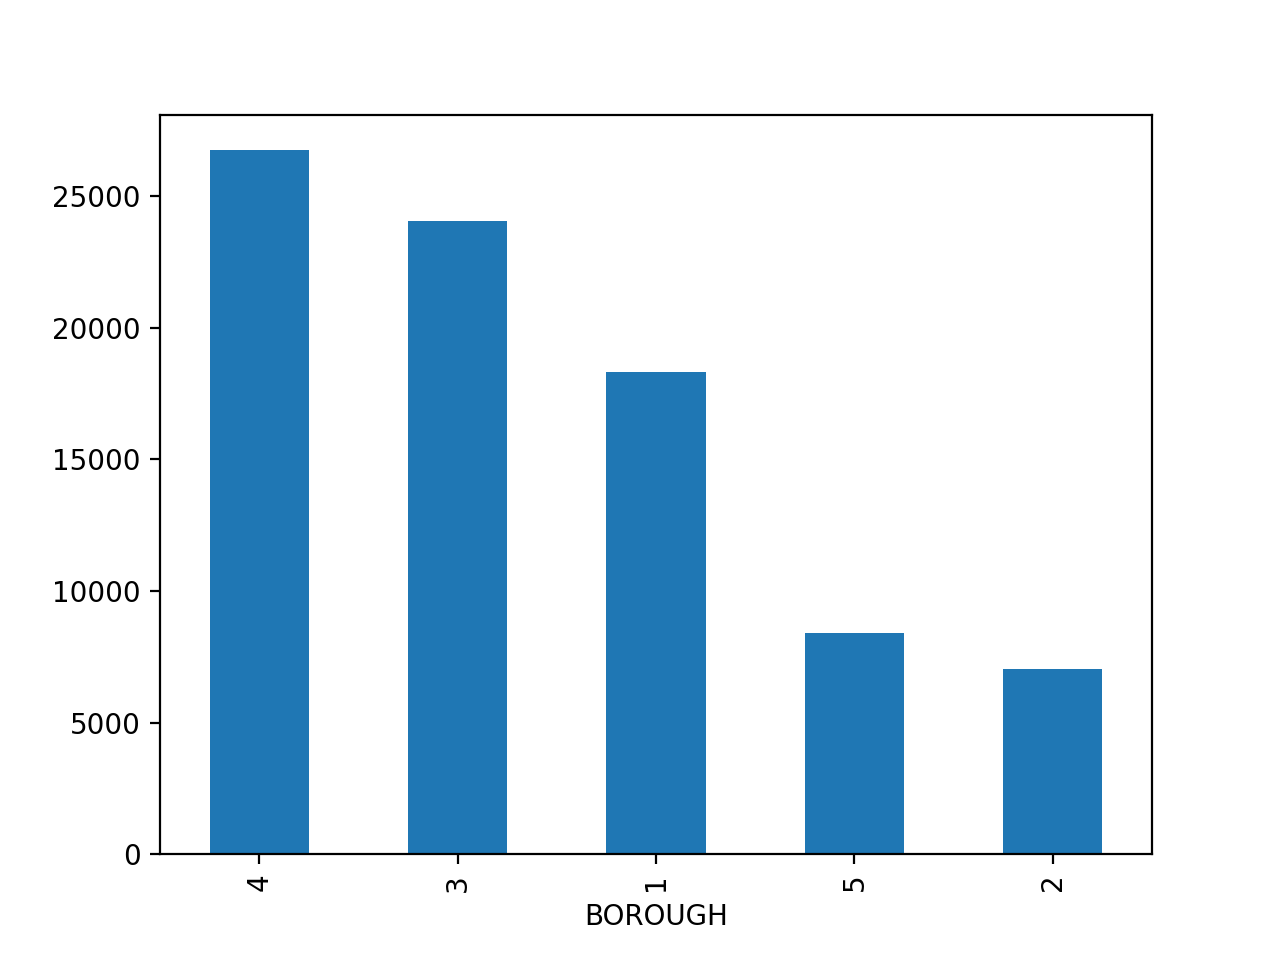

In [ ]:
nyc_prop_db['BOROUGH'].value_counts().plot.bar()

The distributions of `BOROUGH` look fairly even execpt for 5 and 2, which seem to be underepresented in this dataset. This is something we should keep in mind and address as we move further along to ensure we don't introduce biases into our models. We might also want to consider one hot encoding `BOROUGH` due to the small amount of distinct categories.

NEIGHBORHOOD
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: count, Length: 254, dtype: int64

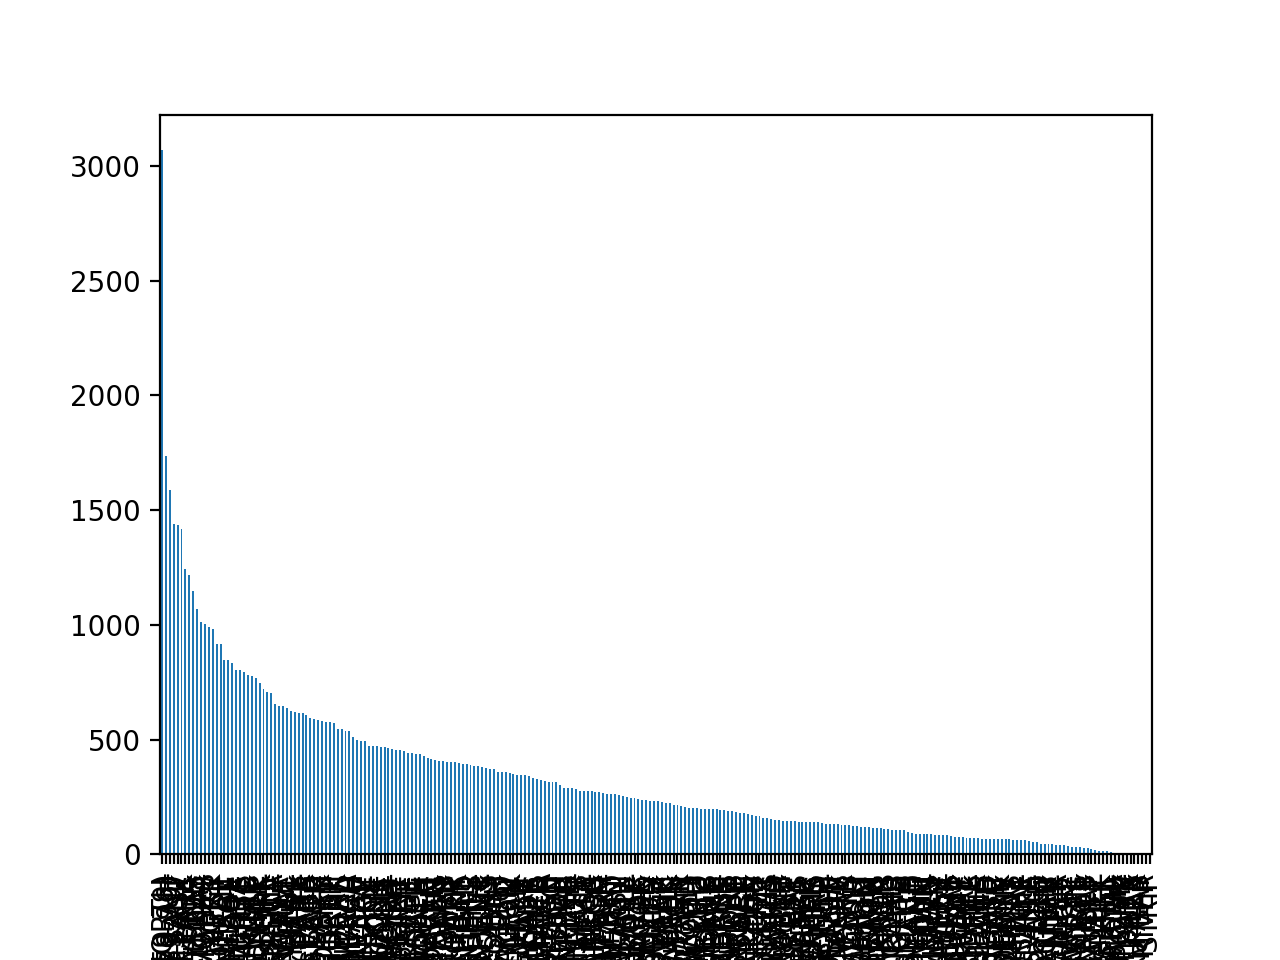

In [ ]:
nyc_prop_db['NEIGHBORHOOD'].value_counts().plot.bar()
nyc_prop_db['NEIGHBORHOOD'].value_counts()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 R

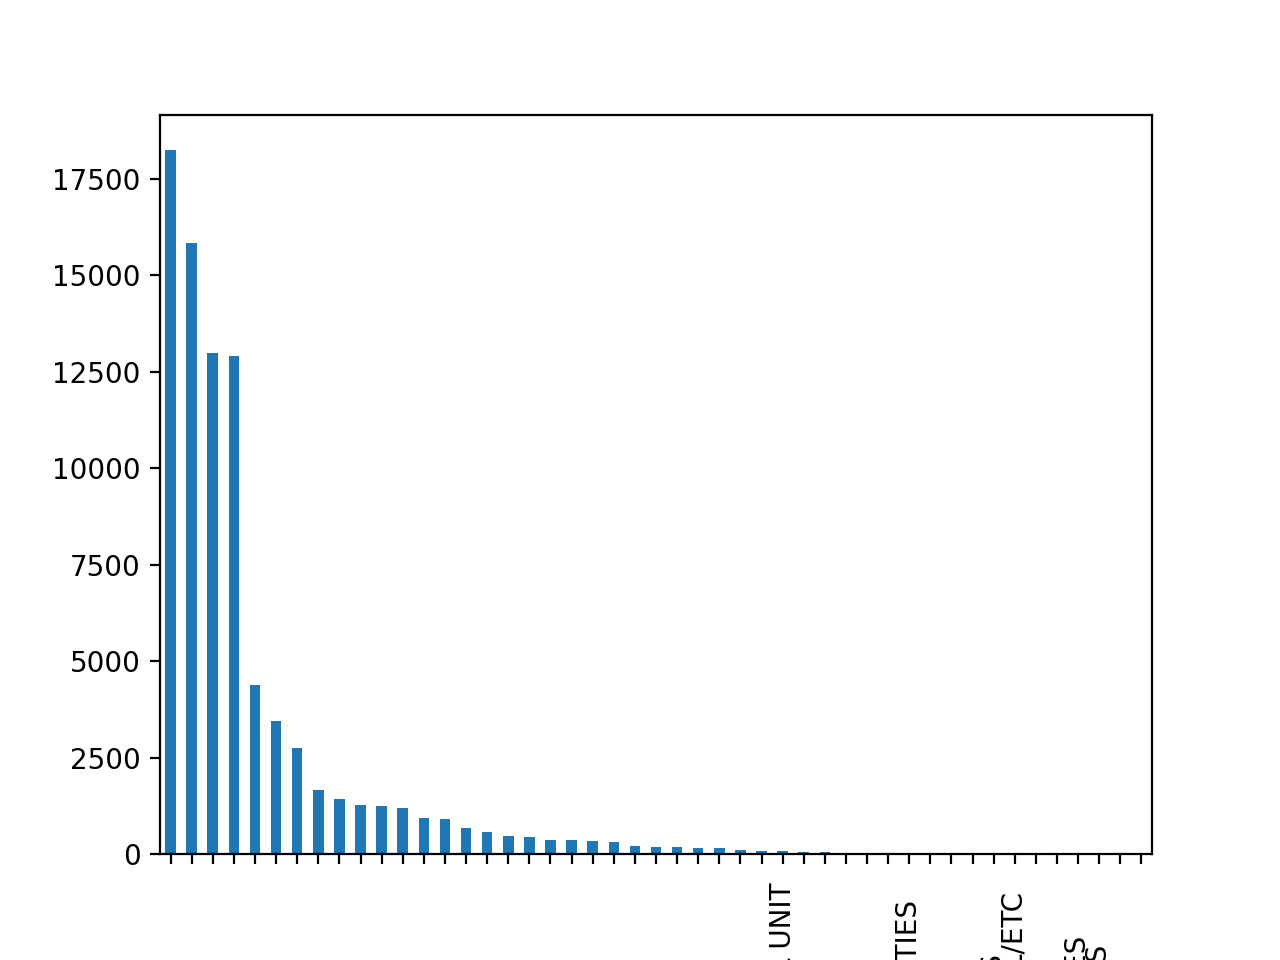

In [ ]:
nyc_prop_db['BUILDING CLASS CATEGORY'].value_counts().plot.bar()
nyc_prop_db['BUILDING CLASS CATEGORY'].value_counts()

From the two graphs above and the listing of the different neighbor hoods and building class categories, it might be a good idea to bucket some of values of `NEIGHBORHOOD` and `BUILDING CLASS CATEGORY`during data cleaning. This will not only help with helping to even out the distribution of each value, but also helps to limit the dimensional complexity of dataset.

In [ ]:
print(nyc_prop_db['LAND SQUARE FEET'].value_counts())
nyc_prop_db['GROSS SQUARE FEET'].value_counts()

LAND SQUARE FEET
 -       26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
5886         1
76712        1
6777         1
10833        1
10796        1
Name: count, Length: 6062, dtype: int64


GROSS SQUARE FEET
 -       27612
0        11417
2400       386
1800       361
2000       359
         ...  
13740        1
12256        1
3823         1
7768         1
64117        1
Name: count, Length: 5691, dtype: int64

From the list of value counts for `LAND SQUARE FEET` and `GROSS SQUARE FEET` it seems like the most common values are 0 or '-' which doesn't make sense for the definitions of both variables. We may want to do something with the rows with these values in our Data Cleaning Step.

YEAR BUILT
0       6970
1920    6045
1930    5043
1925    4312
1910    3585
        ... 
1888       1
1849       1
1855       1
1111       1
1680       1
Name: count, Length: 158, dtype: int64

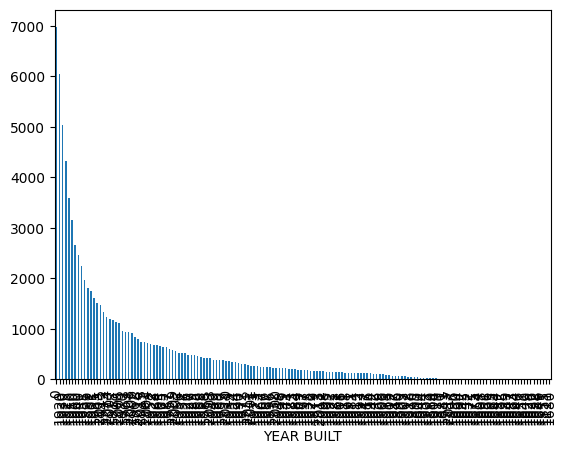

In [ ]:
nyc_prop_db['YEAR BUILT'].value_counts().plot.bar()
nyc_prop_db['YEAR BUILT'].value_counts()

From the graph and list of counts above, we also see that the most common year that a property was built was 0, which doesn't make sense in this context. So we might also want to deal with rows with this value in our data cleaning step. Finally, I want to check for any duplicate rows or if there are any missing values for columns that I've missed.

In [ ]:
print("Duplicated Rows:",nyc_prop_db.duplicated().sum())
print("Missing Values:")
nyc_prop_db.isna().sum(axis = 0)

Duplicated Rows: 0
Missing Values:


Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Looks like our dataset doesn't have any duplicate values, and that I haven't missed any obvious missing values, guess it's time to move on to our data cleaning.

# Part 2: Data Cleaning

In [30]:
nyc_prop_db_clean = nyc_prop_db.copy()

In [31]:
#Turn these columns from objects to categories
objToCats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER','BUILDING CLASS AT TIME OF SALE']
for col in objToCats:
  nyc_prop_db_clean[col] = nyc_prop_db[col].astype('category')

#Turn these columsn from objects to integers
objToInts = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in objToInts:
  nyc_prop_db_clean[col] = pd.to_numeric(nyc_prop_db_clean[col], errors = 'coerce')

#Turn these columns from integers to categories
intsToCats = ['BOROUGH', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE']
for col in intsToCats:
  nyc_prop_db_clean[col] = nyc_prop_db[col].astype('category')

#Turn this column from object to date
nyc_prop_db_clean['SALE DATE'] = pd.to_datetime(nyc_prop_db_clean['SALE DATE'])

In [33]:
print("Duplicated Rows:",nyc_prop_db_clean.duplicated().sum())
print("Missing Values:")
nyc_prop_db_clean.isna().sum(axis = 0)

Duplicated Rows: 0
Missing Values:


Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [39]:
nyc_prop_db_clean[(nyc_prop_db_clean['LAND SQUARE FEET'] == 0) | (nyc_prop_db_clean['LAND SQUARE FEET'].isna())]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,NaN,NaN,1920,2,C6,1.0,2016-09-06
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",...,0,0,0,NaN,NaN,1920,2,C6,499000.0,2017-03-10
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",...,0,0,0,NaN,NaN,1920,2,C6,10.0,2017-04-28
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",...,0,0,0,NaN,NaN,1920,2,C6,529500.0,2017-06-09
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",...,0,0,0,NaN,NaN,1920,2,C6,423000.0,2017-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84412,8278,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1154,,RG,1235 FOREST HILL ROAD,...,0,0,1,NaN,NaN,2015,4,RG,NaN,2017-06-01
84413,8279,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1157,,RG,1235 FOREST HILL ROAD,...,0,0,1,NaN,NaN,2015,4,RG,NaN,2017-04-03
84414,8280,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1158,,RG,1235 FOREST HILL ROAD,...,0,0,1,NaN,NaN,2015,4,RG,NaN,2017-04-28
84415,8281,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1159,,RG,1235 FOREST HILL ROAD,...,0,0,1,NaN,NaN,2015,4,RG,NaN,2017-04-24


In [32]:
nyc_prop_db_clean.dtypes

Unnamed: 0                                 int64
BOROUGH                                 category
NEIGHBORHOOD                            category
BUILDING CLASS CATEGORY                 category
TAX CLASS AT PRESENT                    category
BLOCK                                      int64
LOT                                        int64
EASE-MENT                               category
BUILDING CLASS AT PRESENT               category
ADDRESS                                 category
APARTMENT NUMBER                        category
ZIP CODE                                category
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE          category
SALE PRICE          

Next we should dropping any variables that might serve as major identifiers for observations, such as the 1st column, which seems to be just a numbering of the observations, `ADDRESS`, and `APARTMENT NUMBER`. While we are dropping columns, we might as well also drop `EASE-MENT`, which we found to be completely empty in our EDA.

In [14]:
nyc_prop_db_clean.drop(columns= ['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER'], inplace=True)
nyc_prop_db_clean.describe(include = "all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548.0,84548,84548,84548,84548.000000,84548.000000,84548,84548.0,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.0,84548,6.998700e+04,84548
unique,5.0,254,47,11,NaN,NaN,167,186.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,166,NaN,NaN
top,4.0,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,D4,10314.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,R4,NaN,NaN
freq,26736.0,3068,18235,38633,NaN,NaN,12663,1687.0,NaN,NaN,NaN,NaN,NaN,NaN,41533.0,12989,NaN,NaN
mean,NaN,NaN,NaN,NaN,4237.218976,376.224015,NaN,NaN,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,NaN,NaN,1.276456e+06,2017-02-26 10:03:23.018403584
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000e+00,2016-09-01 00:00:00
25%,NaN,NaN,NaN,NaN,1322.750000,22.000000,NaN,NaN,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,NaN,NaN,2.250000e+05,2016-11-29 00:00:00
50%,NaN,NaN,NaN,NaN,3311.000000,50.000000,NaN,NaN,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,NaN,NaN,5.300000e+05,2017-02-28 00:00:00
75%,NaN,NaN,NaN,NaN,6281.000000,1001.000000,NaN,NaN,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,NaN,NaN,9.500000e+05,2017-05-26 00:00:00
max,NaN,NaN,NaN,NaN,16322.000000,9106.000000,NaN,NaN,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,NaN,NaN,2.210000e+09,2017-08-31 00:00:00


In [16]:
nyc_prop_db_clean = nyc_prop_db_clean[nyc_prop_db_clean['LAND SQUARE FEET'] > 0]
nyc_prop_db_clean = nyc_prop_db_clean[nyc_prop_db_clean['GROSS SQUARE FEET'] > 0]
nyc_prop_db_clean = nyc_prop_db_clean[nyc_prop_db_clean['YEAR BUILT'] > 0]
nyc_prop_db_clean = nyc_prop_db_clean[nyc_prop_db_clean['SALE PRICE'] > 0]
nyc_prop_db_clean.describe(include = "all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,29319.0,29319,29319,29319,29319.000000,29319.000000,29319,29319.0,29319.000000,29319.000000,29319.000000,2.931900e+04,2.931900e+04,29319.000000,29319.0,29319,2.931900e+04,29319
unique,5.0,250,30,6,NaN,NaN,124,180.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,128,NaN,NaN
top,4.0,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,10314.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,A1,NaN,NaN
freq,11072.0,797,12930,25458,NaN,NaN,4838,862.0,NaN,NaN,NaN,NaN,NaN,NaN,25456.0,4834,NaN,NaN
mean,NaN,NaN,NaN,NaN,5550.582114,61.462089,NaN,NaN,3.049797,0.329479,3.377878,4.328777e+03,4.625709e+03,1940.705720,NaN,NaN,1.639260e+06,2017-02-25 07:47:40.329479168
min,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,1800.000000,NaN,NaN,1.000000e+00,2016-09-01 00:00:00
25%,NaN,NaN,NaN,NaN,2681.000000,19.000000,NaN,NaN,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,NaN,NaN,4.200000e+05,2016-11-29 00:00:00
50%,NaN,NaN,NaN,NaN,4903.000000,38.000000,NaN,NaN,2.000000,0.000000,2.000000,2.500000e+03,1.873000e+03,1930.000000,NaN,NaN,6.200000e+05,2017-02-24 00:00:00
75%,NaN,NaN,NaN,NaN,7835.000000,64.000000,NaN,NaN,2.000000,0.000000,2.000000,4.000000e+03,2.676500e+03,1960.000000,NaN,NaN,9.500000e+05,2017-05-26 00:00:00
max,NaN,NaN,NaN,NaN,16319.000000,7501.000000,NaN,NaN,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,NaN,NaN,2.210000e+09,2017-08-31 00:00:00


In [18]:
print("Duplicated Rows:",nyc_prop_db_clean.duplicated().sum())
print("Missing Values:")
nyc_prop_db_clean.isna().sum(axis = 0)

Duplicated Rows: 127
Missing Values:


BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [27]:
nyc_prop_db_clean = nyc_prop_db_clean.drop_duplicates()
print("Duplicated Rows:",nyc_prop_db_clean.duplicated().sum())
print("Missing Values:\n", nyc_prop_db_clean.isna().sum(axis = 0))
nyc_prop_db_clean.describe(include = "all")

Duplicated Rows: 0
Missing Values:
 BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,29192.0,29192,29192,29192,29192.000000,29192.000000,29192,29192.0,29192.000000,29192.000000,29192.000000,2.919200e+04,2.919200e+04,29192.00000,29192.0,29192,2.919200e+04,29192
unique,5.0,250,30,6,NaN,NaN,124,180.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,128,NaN,NaN
top,4.0,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,A1,10314.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,A1,NaN,NaN
freq,11044.0,795,12895,25391,NaN,NaN,4824,862.0,NaN,NaN,NaN,NaN,NaN,NaN,25389.0,4820,NaN,NaN
mean,NaN,NaN,NaN,NaN,5560.302343,61.549055,NaN,NaN,2.987908,0.311215,3.297719,4.201780e+03,4.398072e+03,1940.61373,NaN,NaN,1.640643e+06,2017-02-25 13:25:43.984653312
min,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,1800.00000,NaN,NaN,1.000000e+00,2016-09-01 00:00:00
25%,NaN,NaN,NaN,NaN,2697.500000,19.000000,NaN,NaN,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.00000,NaN,NaN,4.200000e+05,2016-11-29 00:00:00
50%,NaN,NaN,NaN,NaN,4917.000000,38.000000,NaN,NaN,2.000000,0.000000,2.000000,2.500000e+03,1.872000e+03,1930.00000,NaN,NaN,6.200000e+05,2017-02-27 00:00:00
75%,NaN,NaN,NaN,NaN,7847.250000,64.000000,NaN,NaN,2.000000,0.000000,2.000000,4.000000e+03,2.666000e+03,1960.00000,NaN,NaN,9.500000e+05,2017-05-26 00:00:00
max,NaN,NaN,NaN,NaN,16319.000000,7501.000000,NaN,NaN,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.00000,NaN,NaN,2.210000e+09,2017-08-31 00:00:00


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


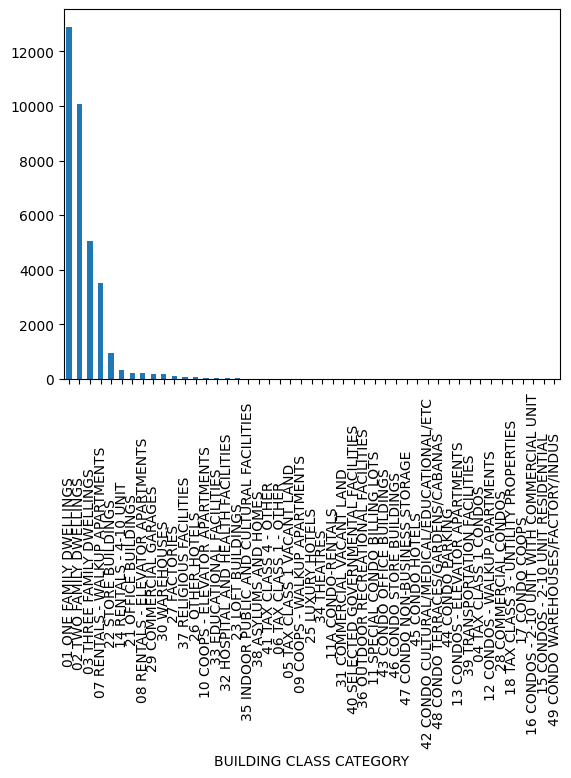

In [29]:
print(nyc_prop_db_clean['BOROUGH'].value_counts().plot.bar())
print(nyc_prop_db_clean['BUILDING CLASS CATEGORY'].value_counts().plot.bar())